# Analyzing Booking Data For Splendor Hotel Groups (SGH)

##### *By Justin Hector*

### Project Overview:

This project involves a thorough analysis of a comprehensive dataset, featuring intricate details of bookings, guest demographics, distribution channels, and financial metrics. By applying analytical prowess, my aim is to extract meaningful insights that will not only inform operational improvements but also contribute to the overall success of SHG in delivering unparalleled hospitality.

### Objectives:

#### Booking Patterns:

- What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?
- How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

#### Customer Behavior Analysis:

- Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels?
- Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?

#### Cancellation Analysis:

- What factors are most strongly correlated with cancellations, and can we predict potential cancellations based on certain variables?
- How does the revenue loss from cancellations compare across different customer segments and distribution channels?

#### Revenue Optimization:

- What is the overall revenue trend, and are there specific customer segments or countries contributing significantly to revenue?
- Can we identify optimal pricing strategies based on the Average Daily Rate (ADR) for different customer types and distribution channels?

#### Geographical Analysis:

- How does the distribution of guests vary across different countries, and are there specific countries that should be targeted for marketing efforts?
- Is there a correlation between the country of origin and the likelihood of cancellations or extended stays?

#### Operational Efficiency:

- What is the average length of stay for guests, and how does it differ based on booking channels or customer types?
- Are there patterns in check-out dates that can inform staffing and resource allocation strategies?

#### Impact Of Deposit Types:

- How does the presence or absence of a deposit impact the likelihood of cancellations and revenue generation?
- Can we identify any patterns in the use of deposit types across different customer segments?

#### Time To Event Analysis:

- How does the time between booking and arrival date (lead time) affect revenue and the likelihood of cancellations?
- Are there specific lead time ranges that are associated with higher customer satisfaction or revenue?

#### Comparison of Online And Online Travel Agents:

- What is the revenue contribution of online travel agents compared to offline travel agents?
- How do cancellation rates and revenue vary between bookings made through online and offline travel agents?

### About The Data

#### Data Dictionary:

- Booking Id - Unique identifier of each booking
- Hotel - Type of name of the hotel within the Splendor Hotel Group
- Booking Date - Date when the booking was made
- Arrival Date - Date when guests are scheduled to arrive
- Lead Time - Number of days between booking date and arrival date
- Nights - Number of nights guests are booked to stay
- Guests - Number of guests included in the booking
- Distribution Channel - The channel through which the booking was made
- Customer Type - Type of customer making the booking
- Country - Country of origin of guests
- Deposit Type - Whether a deposit was made for the booking
- Avg Daily Rate - Average daily rate of the booking
- Status - Status of the booking
- Status Update - Date of the last status of the booking
- Cancelled (0/1) - Binary indicator of whether the booking was cancelled(1) or not cancelled(0)
- Revenue - Revenue generated from the booking
- Revenue Loss - Revenue loss from the booking if cancelled

The dataset can be found [here](https://drive.google.com/drive/folders/1fVXLsP4nvgJJ4kxiUx92Dk8KUJtEgJTQ).

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Data Preparation 

In [3]:
#reading in data
bookings = pd.read_csv("SHG_Booking_Data.csv")
bookings_raw = bookings.copy()

In [4]:
bookings.shape

(119390, 18)

In [5]:
bookings.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Unnamed: 17
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00,NaN
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00,NaN
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00,NaN
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00,NaN
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,$98.00,Check-Out,2015-07-03,0,$196.00,$0.00,NaN


In [6]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Booking ID            119390 non-null  int64  
 1   Hotel                 119390 non-null  object 
 2   Booking Date          119390 non-null  object 
 3   Arrival Date          119390 non-null  object 
 4   Lead Time             119390 non-null  int64  
 5   Nights                119390 non-null  int64  
 6   Guests                119390 non-null  int64  
 7   Distribution Channel  119390 non-null  object 
 8   Customer Type         119390 non-null  object 
 9   Country               118902 non-null  object 
 10  Deposit Type          119390 non-null  object 
 11  Avg Daily Rate        119390 non-null  object 
 12  Status                119390 non-null  object 
 13  Status Update         119390 non-null  object 
 14  Cancelled (0/1)       119390 non-null  int64  
 15  

In [7]:
bookings.describe(include='object').T

,count,unique,top,freq
Hotel,119390,2,City,79330
Booking Date,119390,984,2014-10-17,2511
Arrival Date,119390,793,2015-12-05,448
Distribution Channel,119390,5,Online Travel Agent,74072
Customer Type,119390,4,Transient,89613
Country,118902,174,Portugal,48590
Deposit Type,119390,3,No Deposit,104641
Avg Daily Rate,119390,8879,$62.00,3754
Status,119390,3,Check-Out,75166
Status Update,119390,926,2015-10-21,1461


In [8]:
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
Booking ID,119390.0,59695.500000,34465.068657,1.0,29848.25,59695.5,89542.75,119390.0
Lead Time,119390.0,104.011416,106.863097,0.0,18.00,69.0,160.00,737.0
Nights,119390.0,3.427900,2.557439,0.0,2.00,3.0,4.00,69.0
Guests,119390.0,1.968239,0.722394,0.0,2.00,2.0,2.00,55.0
Cancelled (0/1),119390.0,0.370416,0.482918,0.0,0.00,0.0,1.00,1.0
Unnamed: 17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#checking for missing values
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [10]:
produce_missing_report(bookings)

,column_name,percent_missing
Booking ID,Booking ID,0.000000
Hotel,Hotel,0.000000
Booking Date,Booking Date,0.000000
Arrival Date,Arrival Date,0.000000
Lead Time,Lead Time,0.000000
Nights,Nights,0.000000
Guests,Guests,0.000000
Distribution Channel,Distribution Channel,0.000000
Customer Type,Customer Type,0.000000
Country,Country,0.408744


As we can see there is missing data for the Country column but only 0.4% of data is missing which is very low so we can choose to drop these rows as it should not impact our results significantly.

### Data Cleaning

In [11]:
#dropping the unnamed column
bookings.drop('Unnamed: 17', axis=1, inplace=True)

#removing rows with missing values
bookings.dropna(inplace=True)

In [12]:
bookings.shape

(118902, 17)

In [13]:
produce_missing_report(bookings)

,column_name,percent_missing
Booking ID,Booking ID,0.0
Hotel,Hotel,0.0
Booking Date,Booking Date,0.0
Arrival Date,Arrival Date,0.0
Lead Time,Lead Time,0.0
Nights,Nights,0.0
Guests,Guests,0.0
Distribution Channel,Distribution Channel,0.0
Customer Type,Customer Type,0.0
Country,Country,0.0


In [14]:
#change monetary values to be represented as float values
bookings['Avg Daily Rate'] = bookings['Avg Daily Rate'].str.replace('$','').str.replace(',','').astype(float)
bookings['Revenue'] = bookings['Revenue'].str.replace('$','').str.replace(',','').astype(float)
bookings['Revenue Loss'] = bookings['Revenue Loss'].str.replace('-','').str.replace('$','').str.replace(',','').astype(float)

C:\Users\justi\AppData\Local\Temp\ipykernel_10520\2658672249.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bookings['Avg Daily Rate'] = bookings['Avg Daily Rate'].str.replace('$','').str.replace(',','').astype(float)
C:\Users\justi\AppData\Local\Temp\ipykernel_10520\2658672249.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bookings['Revenue'] = bookings['Revenue'].str.replace('$','').str.replace(',','').astype(float)
C:\Users\justi\AppData\Local\Temp\ipykernel_10520\2658672249.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings 

In [15]:
#convert date columns to datetime
bookings['Booking Date'] = pd.to_datetime(bookings['Booking Date'], format='%Y-%m-%d')
bookings['Arrival Date'] = pd.to_datetime(bookings['Arrival Date'], format='%Y-%m-%d')
bookings['Status Update'] = pd.to_datetime(bookings['Status Update'], format='%Y-%m-%d')

In [16]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            118902 non-null  int64         
 1   Hotel                 118902 non-null  object        
 2   Booking Date          118902 non-null  datetime64[ns]
 3   Arrival Date          118902 non-null  datetime64[ns]
 4   Lead Time             118902 non-null  int64         
 5   Nights                118902 non-null  int64         
 6   Guests                118902 non-null  int64         
 7   Distribution Channel  118902 non-null  object        
 8   Customer Type         118902 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          118902 non-null  object        
 11  Avg Daily Rate        118902 non-null  float64       
 12  Status                118902 non-null  object        
 13 

In [248]:
#creating a column showing days taken to update the status of the booking
#bookings['Status Update Lead Time'] = (bookings['Status Update'] - bookings['Arrival Date']).astype(str)
#bookings['Status Update Lead Time'] = bookings['Status Update Lead Time'].str.replace('days','').astype(int)

In [17]:
#creating columns showing month and year bookings were made
bookings['Booking Month'] = bookings['Booking Date'].dt.month
bookings['Booking Year'] = bookings['Booking Date'].dt.year

In [18]:
#creating columns showing month and year arrivals happened
bookings['Arrival Month'] = bookings['Arrival Date'].dt.month
bookings['Arrival Year'] = bookings['Arrival Date'].dt.year

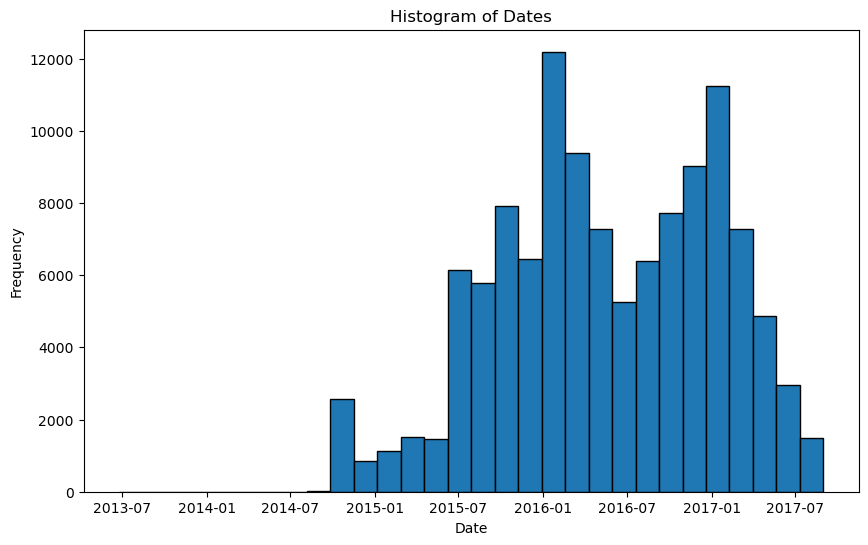

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(bookings['Booking Date'], bins=30, edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Dates')
plt.show()

In [20]:
#function to get season
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Fall'
    else:
        return 'Invalid Month'

In [21]:
bookings['Arrival Season'] = bookings['Arrival Month'].apply(get_season)
bookings['Booking Season'] = bookings['Booking Month'].apply(get_season)

In [22]:
bookings.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,...,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Booking Month,Booking Year,Arrival Month,Arrival Year,Arrival Season,Booking Season
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,...,2015-07-01,0,0.0,0.0,7,2014,7,2015,Summer,Summer
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,...,2015-07-01,0,0.0,0.0,6,2013,7,2015,Summer,Summer
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,...,2015-07-02,0,75.0,0.0,6,2015,7,2015,Summer,Summer
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,...,2015-07-02,0,75.0,0.0,6,2015,7,2015,Summer,Summer
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,...,2015-07-03,0,196.0,0.0,6,2015,7,2015,Summer,Summer


### EDA

In [23]:
#helper function
def plot_bar(df,column):
    plt.figure(figsize=(10, 6))
    sns.set_style('darkgrid')
    sns.countplot(data=df, x=column, palette='pastel')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.title(f'Count of {column} Values')
    ax = sns.countplot(x=column, data=df)
    ax.bar_label(ax.containers[0])

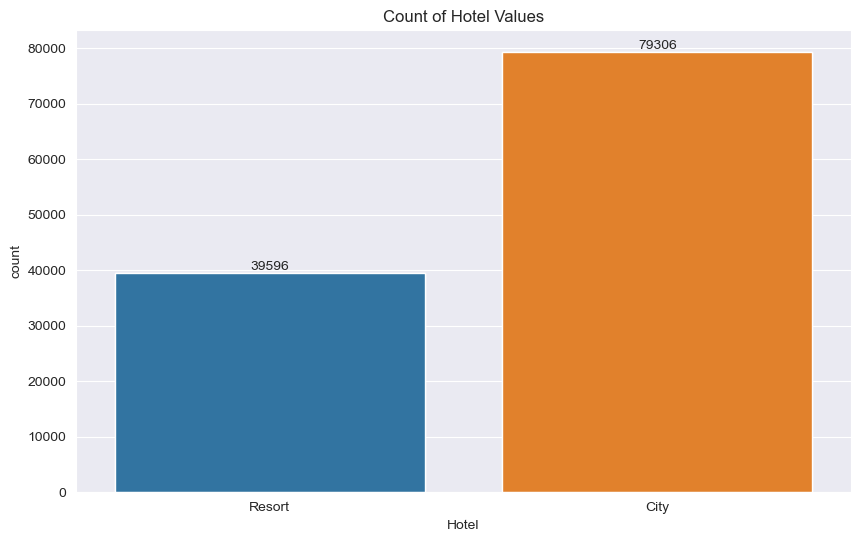

In [24]:
#bookings['Hotel'].value_counts()
plot_bar(bookings,'Hotel')

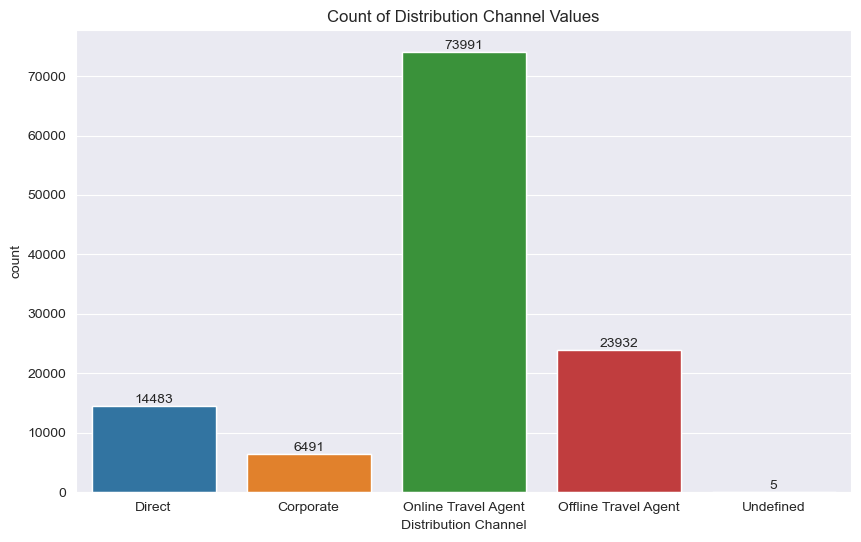

In [25]:
plot_bar(bookings,'Distribution Channel')

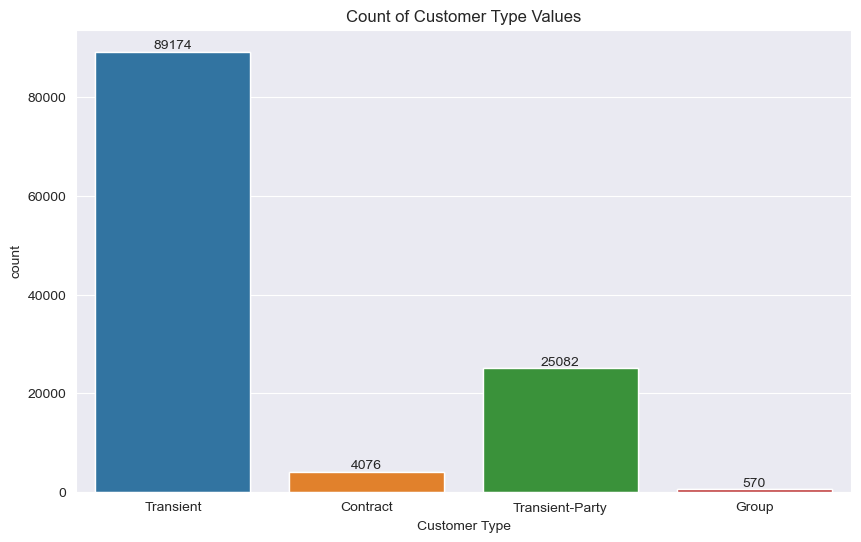

In [26]:
plot_bar(bookings,'Customer Type')

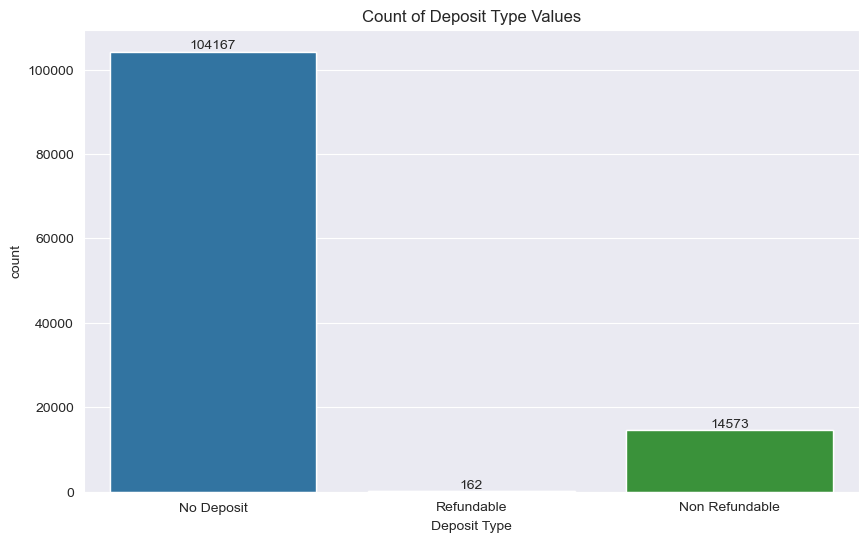

In [27]:
plot_bar(bookings,'Deposit Type')

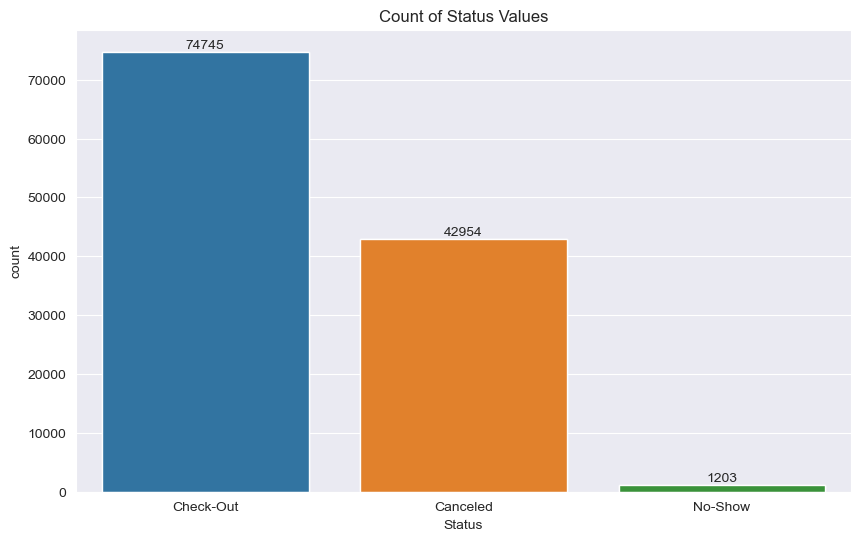

In [28]:
plot_bar(bookings,'Status')

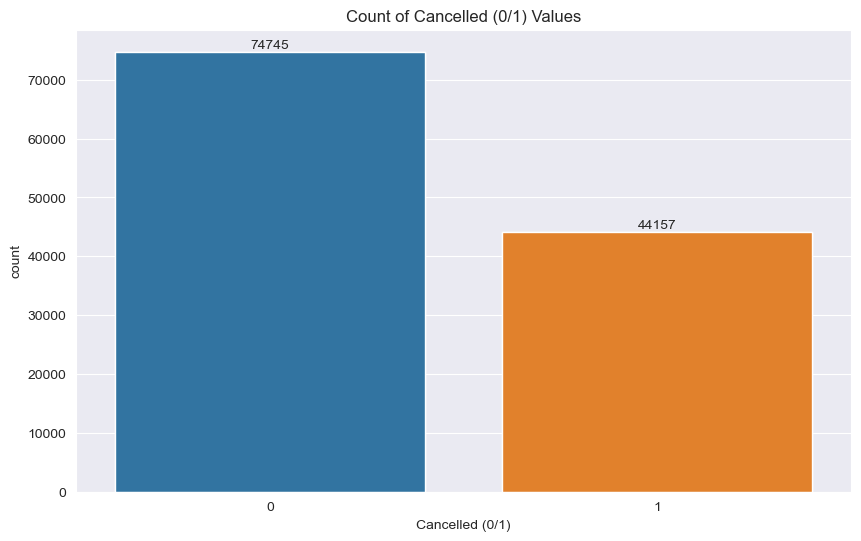

In [29]:
plot_bar(bookings,'Cancelled (0/1)')

#### Analyzing Booking Patterns

In [30]:
bookings['Booking Month'].value_counts()

1     16611
2     13402
10    12078
3      9855
7      9798
11     9455
12     9127
4      8569
9      8167
8      7953
5      7839
6      6048
Name: Booking Month, dtype: int64

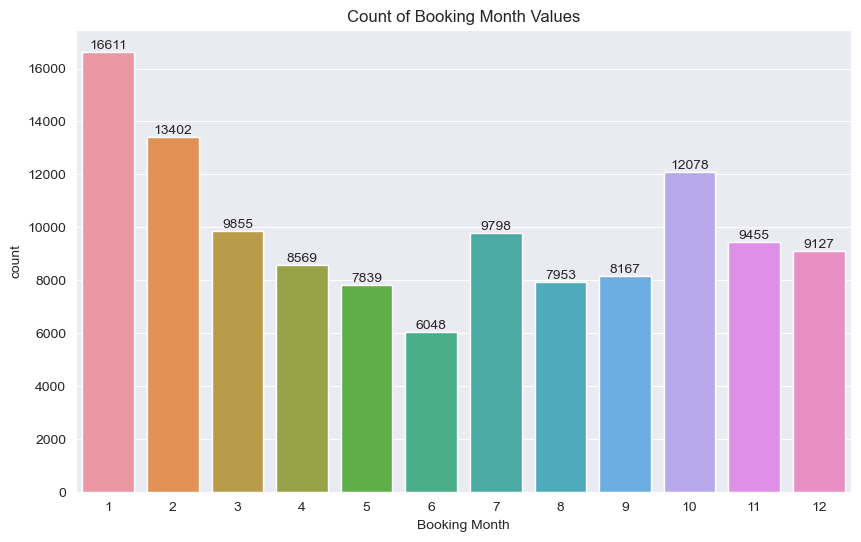

In [31]:
plot_bar(bookings,'Booking Month')

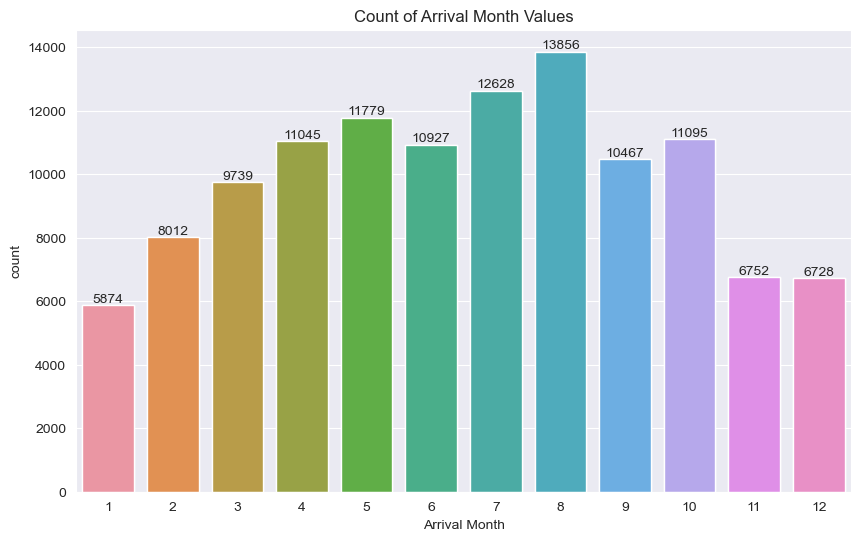

In [32]:
plot_bar(bookings,'Arrival Month')

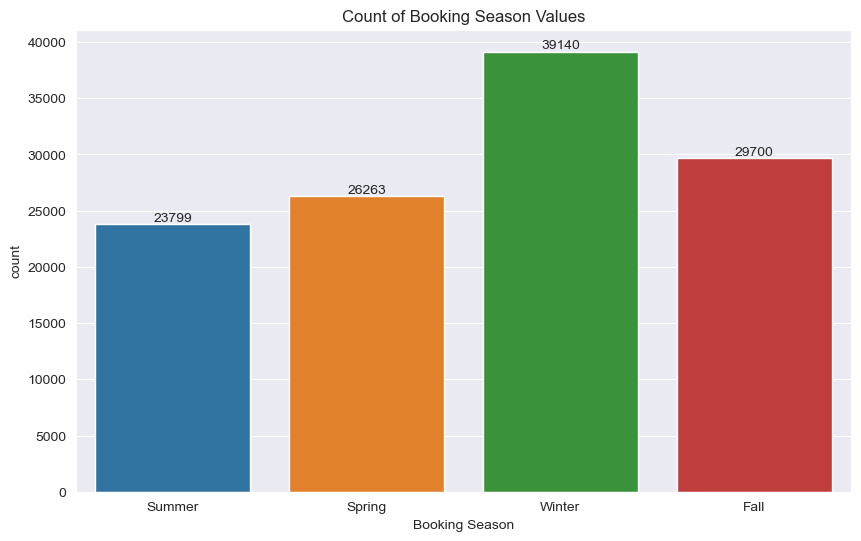

In [33]:
plot_bar(bookings,'Booking Season')

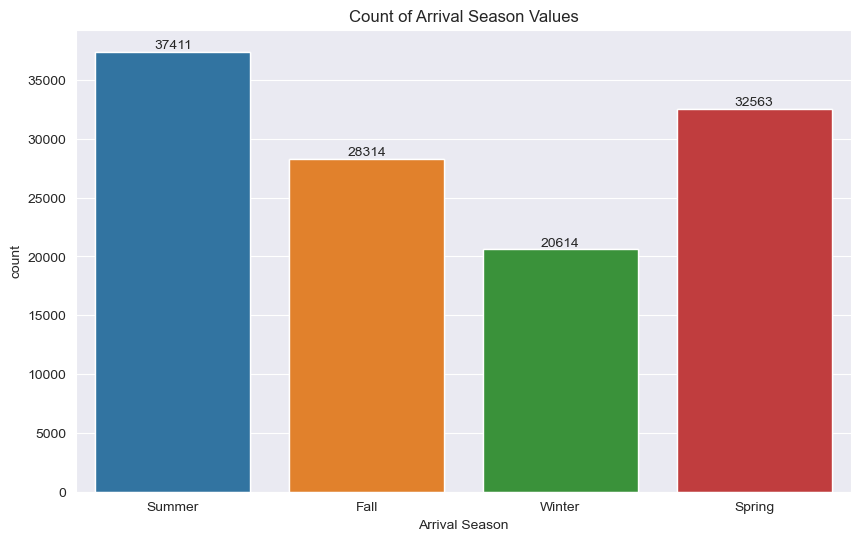

In [34]:
plot_bar(bookings,'Arrival Season')

In [35]:
booked_for_season = bookings.groupby('Booking Season')['Arrival Season'].value_counts()
print(booked_for_season)

Booking Season  Arrival Season
Fall            Fall              13456
                Winter             6136
                Spring             5241
                Summer             4867
Spring          Summer            11365
                Spring            11160
                Fall               3265
                Winter              473
Summer          Summer            12068
                Fall               8050
                Spring             2100
                Winter             1581
Winter          Spring            14062
                Winter            12424
                Summer             9111
                Fall               3543
Name: Arrival Season, dtype: int64


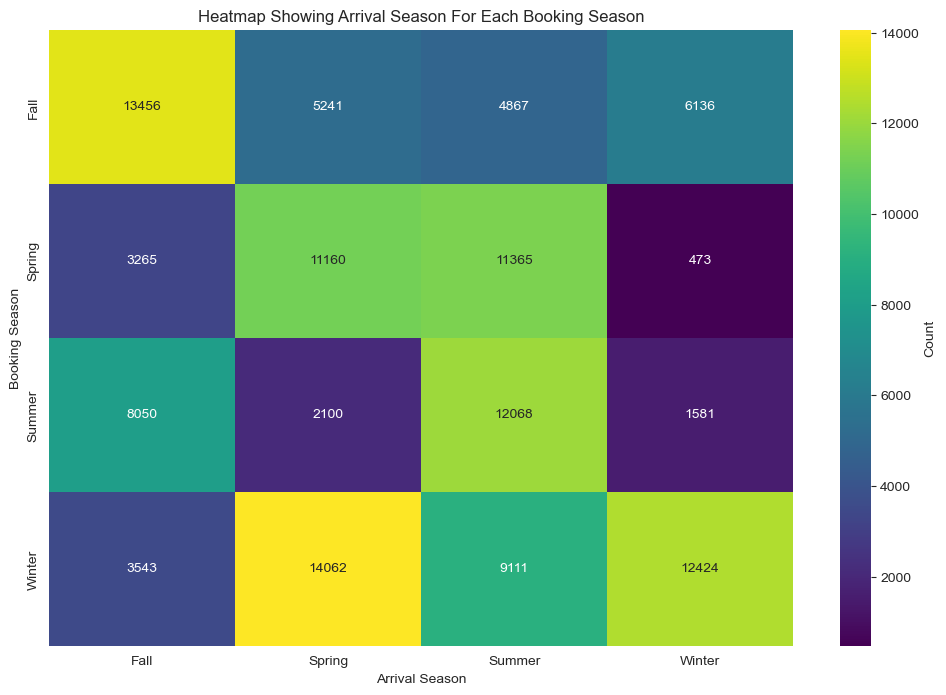

In [36]:
season_pivot = bookings.pivot_table(index='Booking Season', columns='Arrival Season', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(season_pivot, annot=True, fmt='d',cmap='viridis',cbar_kws={'label':'Count'})
plt.title('Heatmap Showing Arrival Season For Each Booking Season')
plt.show()

In [39]:
bookings['Lead Time'].describe()

count    118902.000000
mean        104.308027
std         106.903127
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: Lead Time, dtype: float64

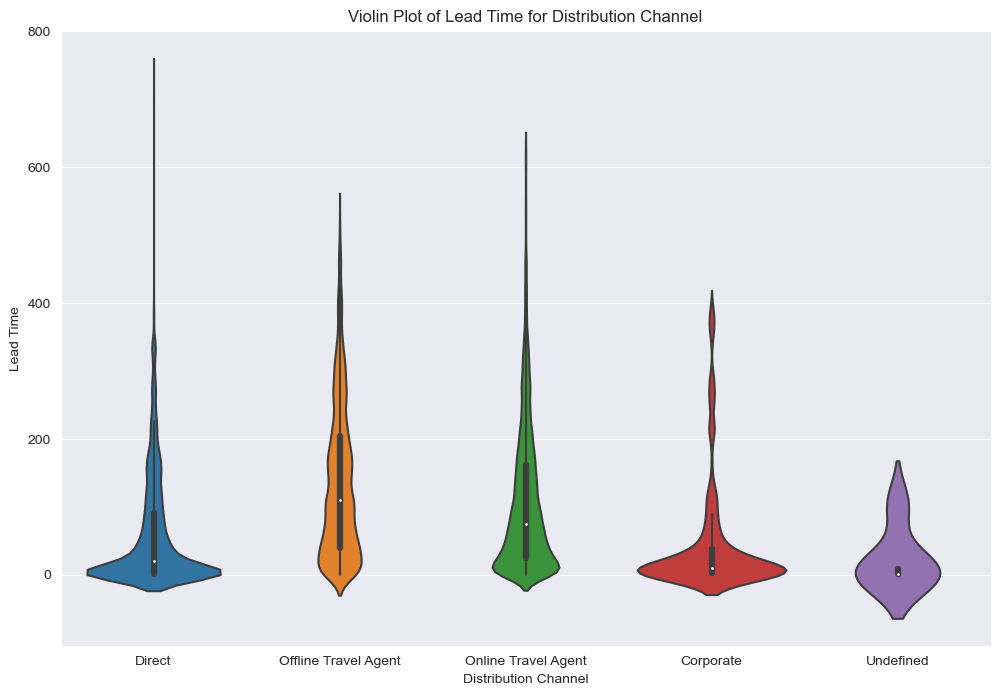

In [139]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Distribution Channel', y ='Lead Time',data=bookings)
plt.xlabel('Distribution Channel')
plt.ylabel('Lead Time')
plt.title('Violin Plot of Lead Time for Distribution Channel')
plt.show()

In [42]:
lead_time_stats_dist_channel = bookings.groupby('Distribution Channel')['Lead Time'].describe().T
print(lead_time_stats_dist_channel)

Distribution Channel    Corporate        Direct  Offline Travel Agent  \
count                 6491.000000  14483.000000          23932.000000   
mean                    46.054999     58.174342            135.596273   
std                     83.997031     79.241224            112.313124   
min                      0.000000      0.000000              0.000000   
25%                      3.000000      1.000000             40.000000   
50%                     10.000000     20.000000            110.000000   
75%                     38.000000     91.000000            204.000000   
max                    390.000000    737.000000            532.000000   

Distribution Channel  Online Travel Agent   Undefined  
count                        73991.000000    5.000000  
mean                           108.334068   23.000000  
std                            106.722129   44.816292  
min                              0.000000    1.000000  
25%                             25.000000    1.000000  
50%   

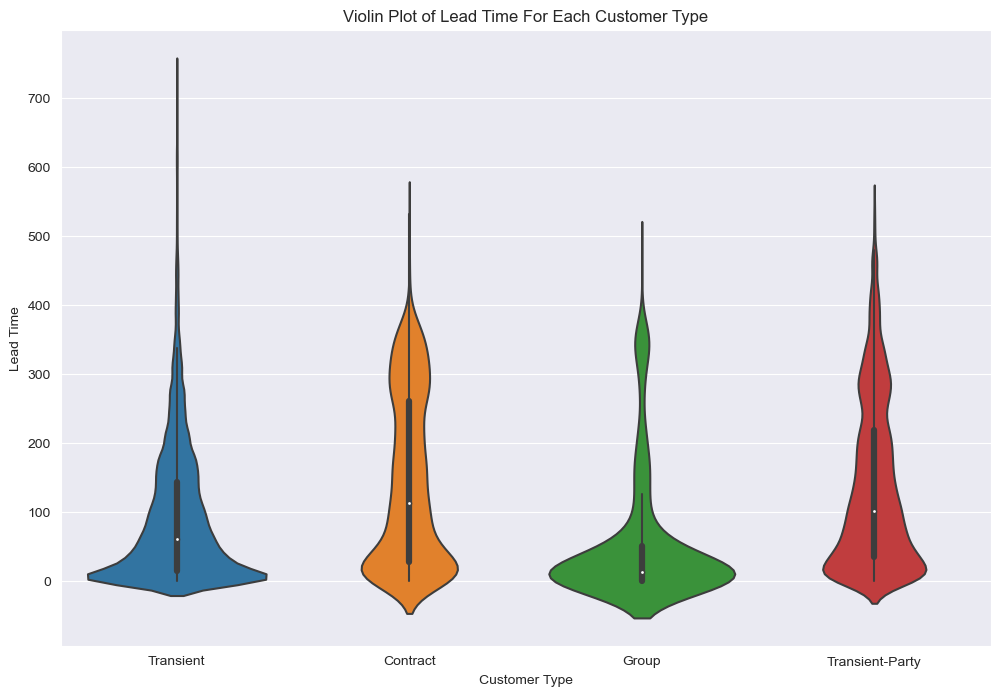

In [43]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Customer Type', y='Lead Time', data=bookings)
plt.xlabel('Customer Type')
plt.ylabel('Lead Time')
plt.title('Violin Plot of Lead Time For Each Customer Type')
plt.show()

In [44]:
lead_time_stats_customer_type = bookings.groupby('Customer Type')['Lead Time'].describe().T
print(lead_time_stats_customer_type)

Customer Type     Contract       Group     Transient  Transient-Party
count          4076.000000  570.000000  89174.000000     25082.000000
mean            142.969823   55.724561     93.631574       137.087274
std             122.001532   93.936333     99.778636       119.942432
min               0.000000    0.000000      0.000000         0.000000
25%              27.750000    1.000000     15.000000        36.000000
50%             114.000000   13.000000     61.000000       102.000000
75%             261.000000   51.000000    144.000000       219.000000
max             532.000000  468.000000    737.000000       542.000000


#### Customer Behavior Analysis

In [45]:
print("The maximum average daily rate: $",bookings['Avg Daily Rate'].max())
print("The minimum average daily rate: $",bookings['Avg Daily Rate'].min())

The maximum average daily rate: $ 5400.0
The minimum average daily rate: $ -6.38


In [46]:
highest_avg_daily_rate = bookings[bookings['Avg Daily Rate'] == 5400]
highest_avg_daily_rate

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,...,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Booking Month,Booking Year,Arrival Month,Arrival Year,Arrival Season,Booking Season
48515,48516,City,2016-02-19,2016-03-25,35,1,2,Offline Travel Agent,Transient,Portugal,...,2016-02-19,1,5400.0,0.0,2,2016,3,2016,Spring,Winter


In [47]:
lowest_avg_daily_rate = bookings[bookings['Avg Daily Rate'] == bookings['Avg Daily Rate'].min()]
lowest_avg_daily_rate

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,...,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Booking Month,Booking Year,Arrival Month,Arrival Year,Arrival Season,Booking Season
14969,14970,Resort,2016-08-22,2017-03-05,195,10,2,Direct,Transient-Party,United Kingdom,...,2017-03-15,0,-63.8,0.0,8,2016,3,2017,Spring,Summer


In [48]:
#dropping both rows from dataframe
bookings.drop(bookings[bookings['Booking ID'] == 48516].index, inplace=True)
bookings.drop(bookings[bookings['Booking ID'] == 14970].index, inplace=True)

In [49]:
print("The maximum average daily rate: $",bookings['Avg Daily Rate'].max())
print("The minimum average daily rate: $",bookings['Avg Daily Rate'].min())

The maximum average daily rate: $ 510.0
The minimum average daily rate: $ 0.0


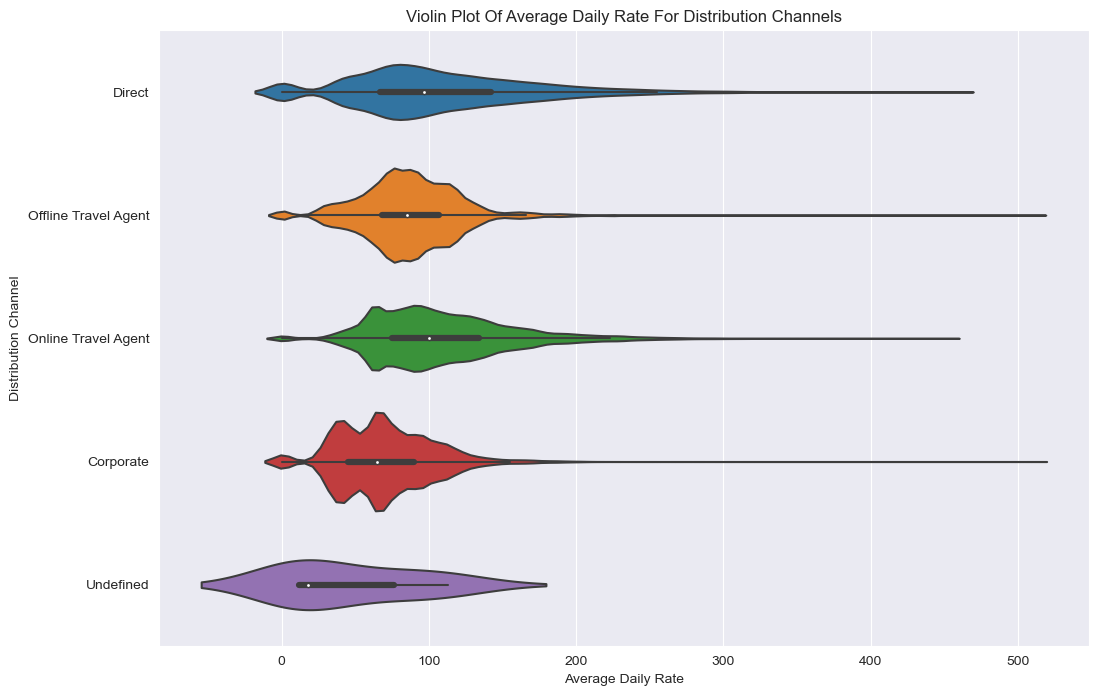

In [51]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Avg Daily Rate',y='Distribution Channel',data=bookings)
plt.title('Violin Plot Of Average Daily Rate For Distribution Channels')
plt.xlabel('Average Daily Rate')
plt.ylabel('Distribution Channel')
plt.show()

In [52]:
adr_grouped = bookings.groupby('Distribution Channel')
adr_per_channel = adr_grouped['Avg Daily Rate'].mean()
print(adr_per_channel)

Distribution Channel
Corporate                70.094622
Direct                  107.003439
Offline Travel Agent     87.001862
Online Travel Agent     108.605447
Undefined                46.240000
Name: Avg Daily Rate, dtype: float64


In [53]:
bookings['Country'].nunique()

174

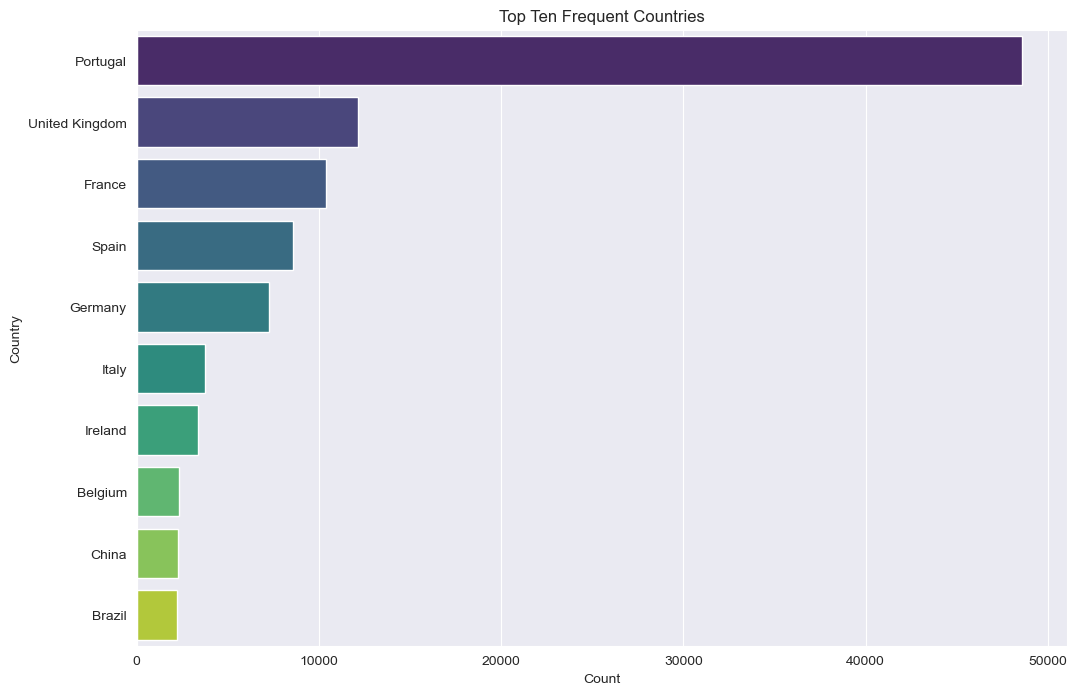

In [54]:
top_10_countries = bookings['Country'].value_counts().head(10)
plt.figure(figsize=(12,8))
ax = sns.countplot(y='Country', data=bookings, order=top_10_countries.index, palette='viridis')
plt.title('Top Ten Frequent Countries')
plt.xlabel('Count')
plt.show()

#### Cancellation Analysis

In [55]:
#zooming in on cancelled data

bookings_cancelled = bookings[bookings['Cancelled (0/1)'] == 1] 

In [56]:
bookings_cancelled.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,...,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Booking Month,Booking Year,Arrival Month,Arrival Year,Arrival Season,Booking Season
81,82,Resort,2014-06-30,2015-07-03,368,10,2,Offline Travel Agent,Contract,Portugal,...,2015-05-19,1,0.0,556.80,6,2014,7,2015,Summer,Summer
365,366,Resort,2014-08-26,2015-07-13,321,5,2,Online Travel Agent,Transient,Portugal,...,2015-03-05,1,0.0,664.00,8,2014,7,2015,Summer,Summer
881,882,Resort,2014-09-09,2015-08-02,327,14,2,Offline Travel Agent,Contract,Portugal,...,2015-04-23,1,0.0,1463.70,9,2014,8,2015,Summer,Fall
664,665,Resort,2014-09-15,2015-07-24,312,14,3,Offline Travel Agent,Contract,Portugal,...,2015-07-21,1,0.0,1707.72,9,2014,7,2015,Summer,Fall
208,209,Resort,2014-09-18,2015-07-07,292,7,2,Offline Travel Agent,Contract,Portugal,...,2015-03-25,1,0.0,330.75,9,2014,7,2015,Summer,Fall


In [57]:
bookings_cancelled.shape

(44156, 23)

Text(0.5, 1.0, 'Deposit Type By Cancelled/Not Cancelled Bookings')

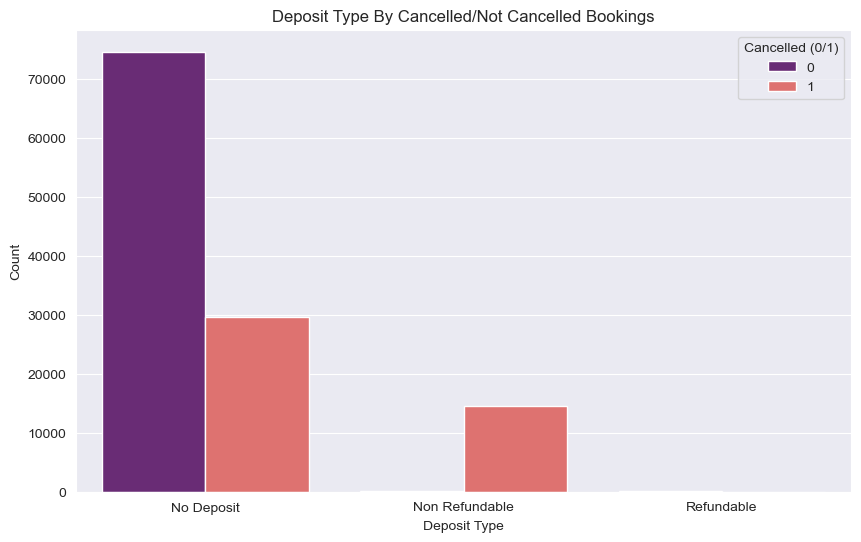

In [61]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(data=bookings,x='Deposit Type',hue='Cancelled (0/1)',palette='magma')
plt.ylabel('Count')
plt.xlabel('Deposit Type')
plt.title('Deposit Type By Cancelled/Not Cancelled Bookings')

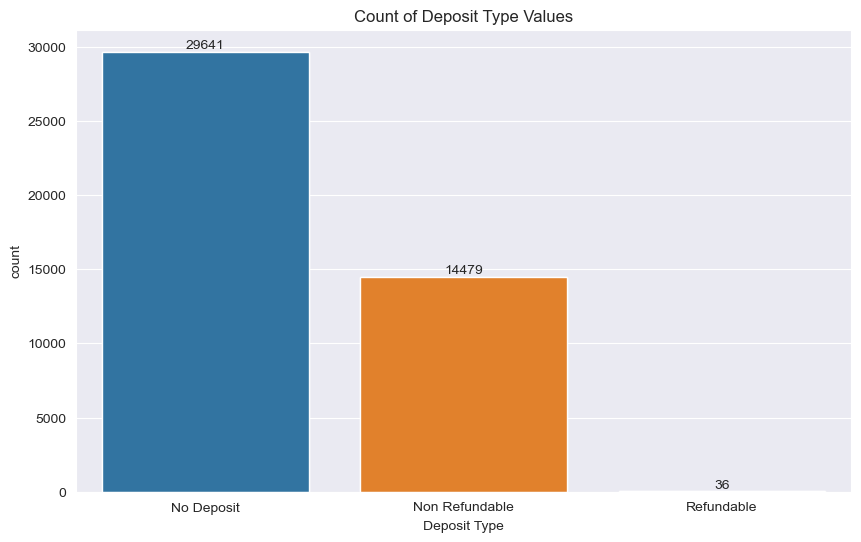

In [62]:
plot_bar(bookings_cancelled,'Deposit Type')

Text(0.5, 1.0, 'Distribution Channels By Cancelled/Not Cancelled Bookings')

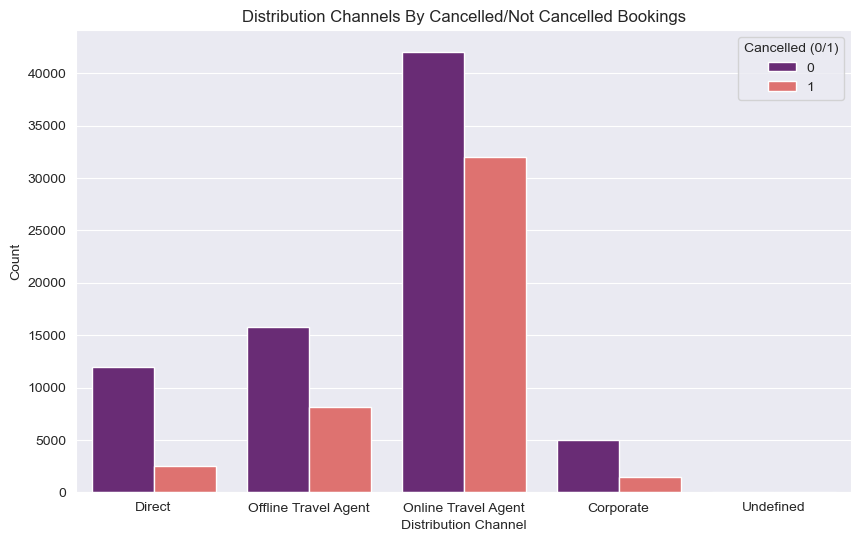

In [63]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(data=bookings,x='Distribution Channel',hue='Cancelled (0/1)',palette='magma')
plt.ylabel('Count')
plt.xlabel('Distribution Channel')
plt.title('Distribution Channels By Cancelled/Not Cancelled Bookings')

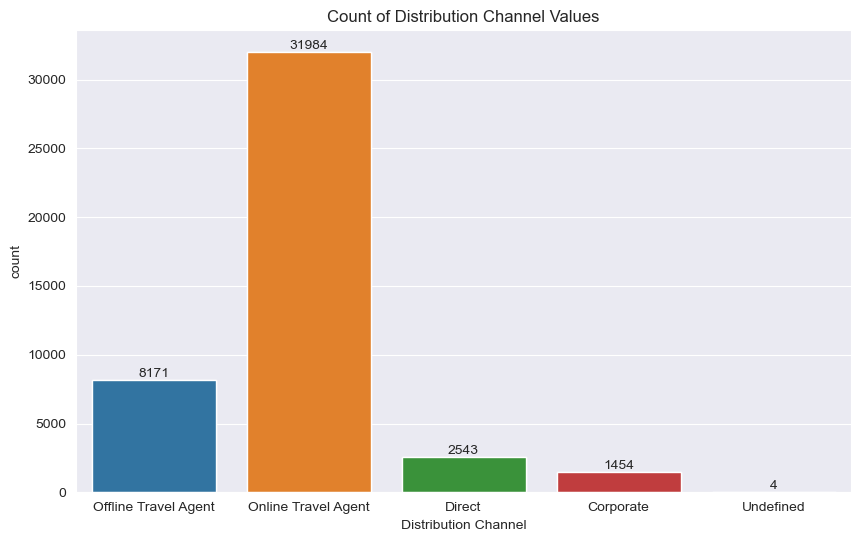

In [64]:
plot_bar(bookings_cancelled,'Distribution Channel')

Text(0.5, 1.0, 'Customer Type By Cancelled/Not Cancelled Bookings')

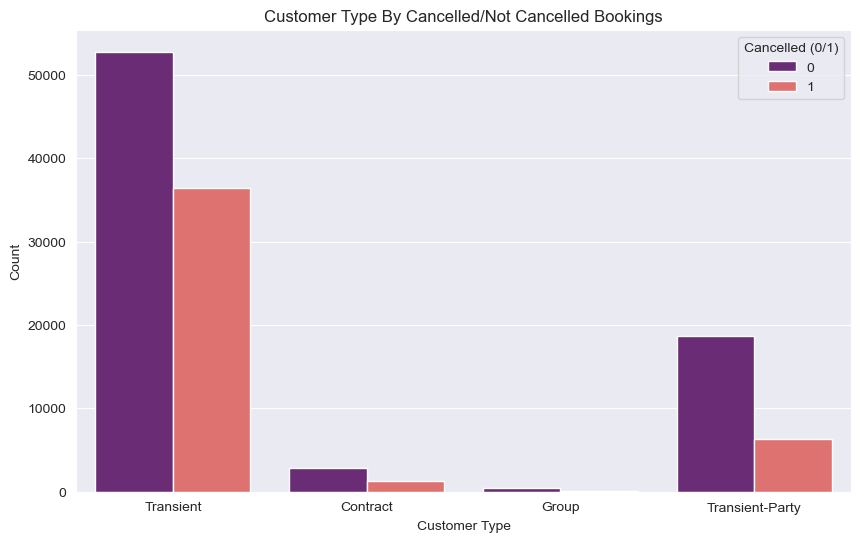

In [65]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(data=bookings,x='Customer Type',hue='Cancelled (0/1)',palette='magma')
plt.ylabel('Count')
plt.xlabel('Customer Type')
plt.title('Customer Type By Cancelled/Not Cancelled Bookings')

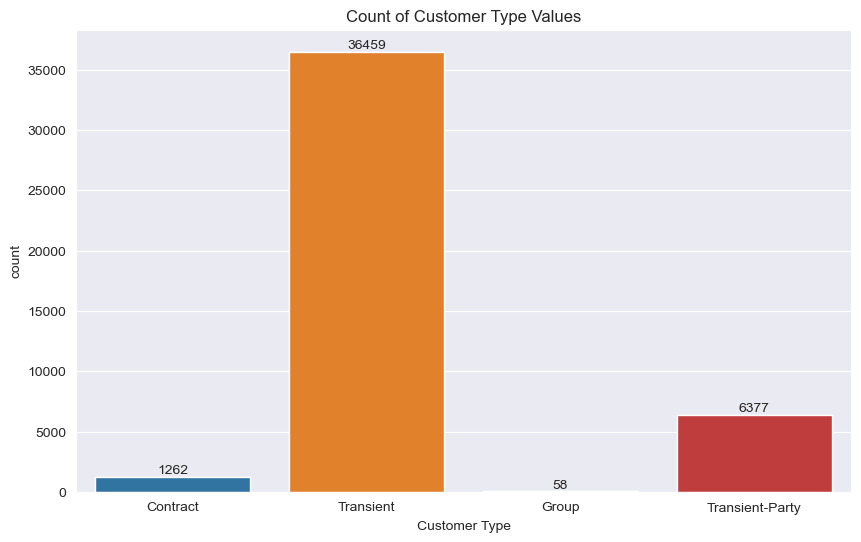

In [66]:
plot_bar(bookings_cancelled,'Customer Type')

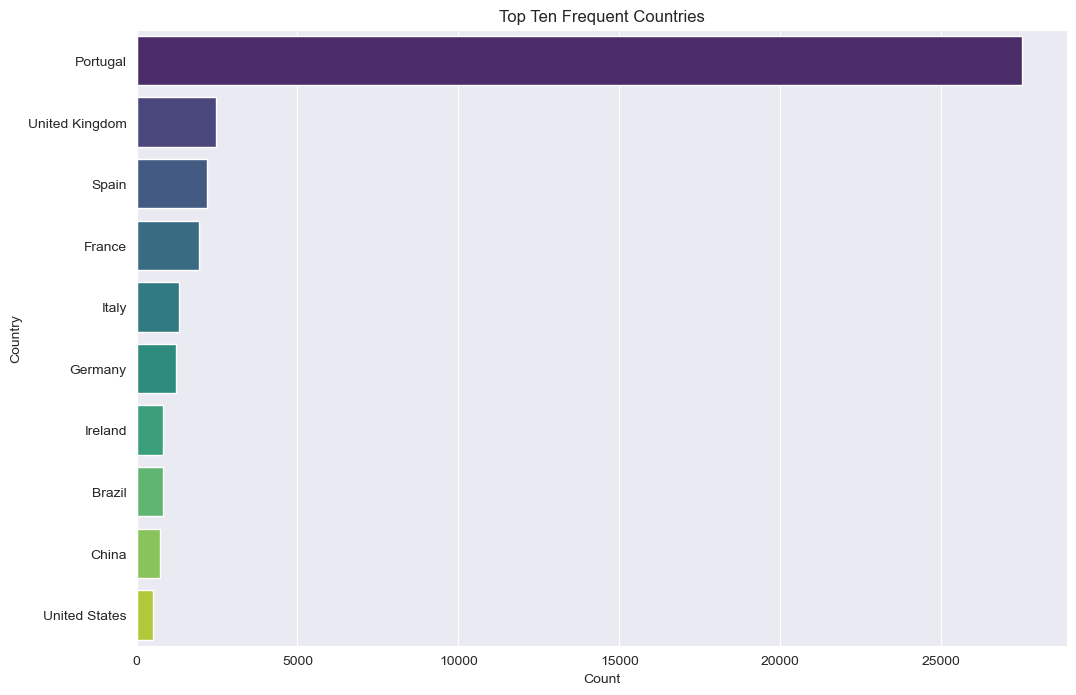

In [67]:
top_10_countries = bookings_cancelled['Country'].value_counts().head(10)
plt.figure(figsize=(12,8))
ax = sns.countplot(y='Country', data=bookings_cancelled, order=top_10_countries.index, palette='viridis')
plt.title('Top Ten Frequent Countries')
plt.xlabel('Count')
plt.show()

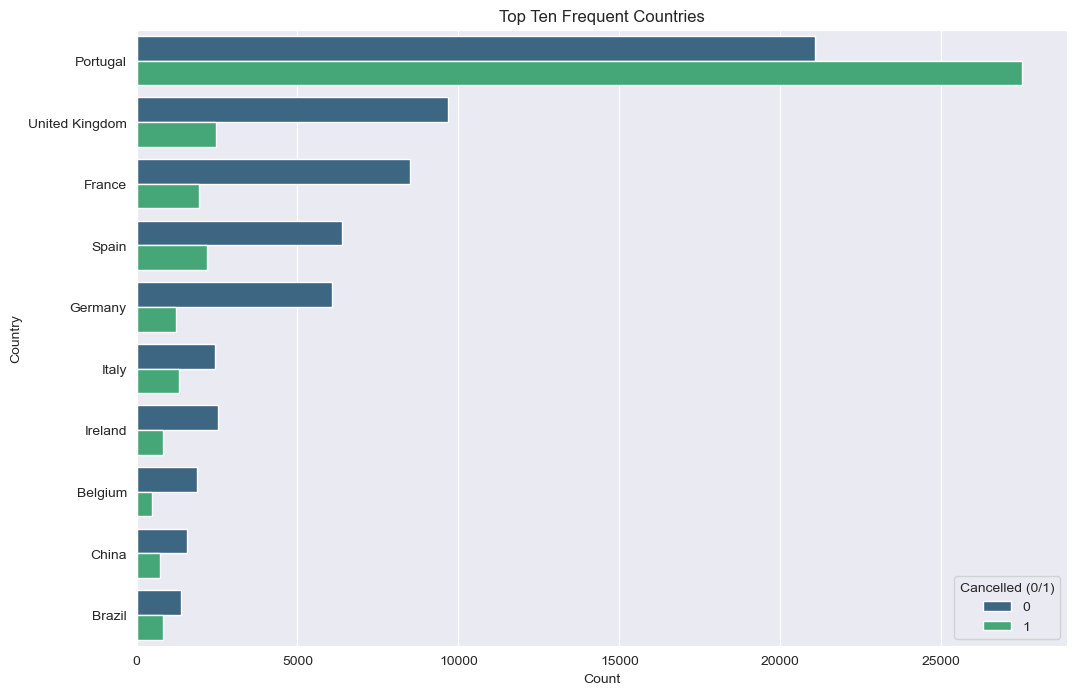

In [104]:
top_10_countries = bookings['Country'].value_counts().head(10)
plt.figure(figsize=(12,8))
ax = sns.countplot(y='Country', data=bookings, hue='Cancelled (0/1)', order=top_10_countries.index, palette='viridis')
plt.title('Top Ten Frequent Countries')
plt.xlabel('Count')
plt.show()

In [68]:
bookings_cancelled['Cancelled (0/1)'] = bookings_cancelled['Cancelled (0/1)'].astype(object)

C:\Users\justi\AppData\Local\Temp\ipykernel_10520\1001905154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bookings_cancelled['Cancelled (0/1)'] = bookings_cancelled['Cancelled (0/1)'].astype(object)


In [69]:
cancelled_matrix = bookings.corr()['Cancelled (0/1)'].sort_values(ascending=False)
print(cancelled_matrix)

Cancelled (0/1)    1.000000
Revenue Loss       0.516922
Lead Time          0.291957
Booking Month      0.050596
Avg Daily Rate     0.047212
Guests             0.045047
Nights             0.016991
Arrival Year       0.016350
Arrival Month      0.010330
Booking Year      -0.114590
Booking ID        -0.246262
Revenue           -0.428279
Name: Cancelled (0/1), dtype: float64


C:\Users\justi\AppData\Local\Temp\ipykernel_10520\1360035972.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cancelled_matrix = bookings.corr()['Cancelled (0/1)'].sort_values(ascending=False)


In [70]:
# Descriptive statistics for 'lead time' for cancelled bookings
cancelled_lead_time_stats = bookings[bookings['Cancelled (0/1)'] == 1]['Lead Time'].describe()

# Descriptive statistics for 'lead time' for non-cancelled bookings
non_cancelled_lead_time_stats = bookings[bookings['Cancelled (0/1)'] == 0]['Lead Time'].describe()

print("Cancelled Bookings Lead Time Statistics:")
print(cancelled_lead_time_stats)

print("\nNon-Cancelled Bookings Lead Time Statistics:")
print(non_cancelled_lead_time_stats)


Cancelled Bookings Lead Time Statistics:
count    44156.000000
mean       144.914938
std        118.638651
min          0.000000
25%         49.000000
50%        113.000000
75%        215.000000
max        629.000000
Name: Lead Time, dtype: float64

Non-Cancelled Bookings Lead Time Statistics:
count    74744.000000
mean        80.318674
std         91.188179
min          0.000000
25%          9.000000
50%         46.000000
75%        125.000000
max        737.000000
Name: Lead Time, dtype: float64


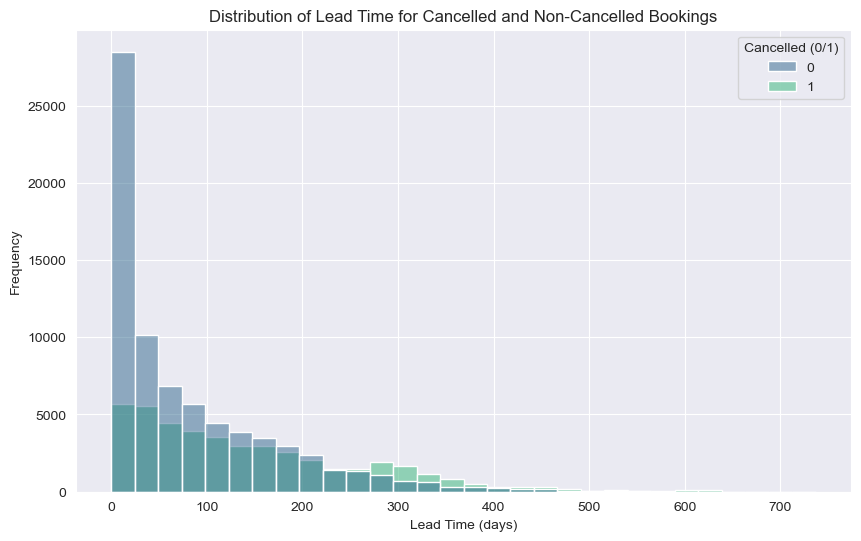

In [71]:
# Distribution plot for 'lead time' for cancelled and non-cancelled bookings
plt.figure(figsize=(10, 6))
sns.histplot(bookings, x='Lead Time', hue='Cancelled (0/1)', kde=False, bins=30, palette='viridis')
plt.title('Distribution of Lead Time for Cancelled and Non-Cancelled Bookings')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


In [72]:
print(len(bookings[(bookings['Lead Time'] >= 280) & (bookings['Cancelled (0/1)'] == 1)]))
print(len(bookings[(bookings['Lead Time'] >= 280) & (bookings['Cancelled (0/1)'] == 0)]))


6585
3274


In [73]:
#revenue loss sum for each distribution channel
print(bookings_cancelled.groupby('Distribution Channel')['Revenue Loss'].sum())

Distribution Channel
Corporate                 194505.69
Direct                   1027863.65
Offline Travel Agent     1104390.47
Online Travel Agent     10782870.82
Undefined                    607.50
Name: Revenue Loss, dtype: float64


In [74]:
#revenue loss basic descriptive stats for each distribution channel
print(bookings_cancelled.groupby('Distribution Channel')['Revenue Loss'].describe().T)

Distribution Channel    Corporate       Direct  Offline Travel Agent  \
count                 1454.000000  2543.000000           8171.000000   
mean                   133.772827   404.193335            135.159769   
std                    230.951630   517.387502            259.870270   
min                      0.000000     0.000000              0.000000   
25%                      0.000000    70.000000              0.000000   
50%                     80.000000   233.200000              0.000000   
75%                    140.000000   530.550000            206.040000   
max                   2730.000000  6148.000000           2945.000000   

Distribution Channel  Online Travel Agent   Undefined  
count                        31984.000000    4.000000  
mean                           337.133280  151.875000  
std                            398.032337  255.937614  
min                              0.000000   12.000000  
25%                              0.000000   21.000000  
50%            

In [75]:
print(bookings_cancelled.groupby('Customer Type')['Revenue Loss'].sum())

Customer Type
Contract             283888.62
Group                 17325.19
Transient          11494579.87
Transient-Party     1314444.45
Name: Revenue Loss, dtype: float64


In [76]:
print(bookings_cancelled.groupby('Customer Type')['Revenue Loss'].describe().T)

Customer Type     Contract        Group     Transient  Transient-Party
count          1262.000000    58.000000  36459.000000      6377.000000
mean            224.951363   298.710172    315.274140       206.122699
std             318.843566   482.976788    413.136134       207.661044
min               0.000000     0.000000      0.000000         0.000000
25%               0.000000     0.000000      0.000000        80.000000
50%             124.000000   120.800000    208.800000       184.000000
75%             341.752500   406.650000    456.000000       260.000000
max            2003.980000  3039.960000   6300.000000      3039.960000


#### Revenue Optimization

In [78]:
print("Revenue Gained:",bookings['Revenue'].sum())
print("Revenue Lost:", bookings['Revenue Loss'].sum())
#print("Profit:",bookings['Total Revenue'].sum()) #did not use the total revenue column which was created using Revenue-Revenue Loss

Revenue Gained: 29505235.65
Revenue Lost: 13110238.129999997


C:\Users\justi\AppData\Local\Temp\ipykernel_10520\4214713947.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Type', y='Revenue', data=bookings, estimator=sum, ci=None, palette='viridis')


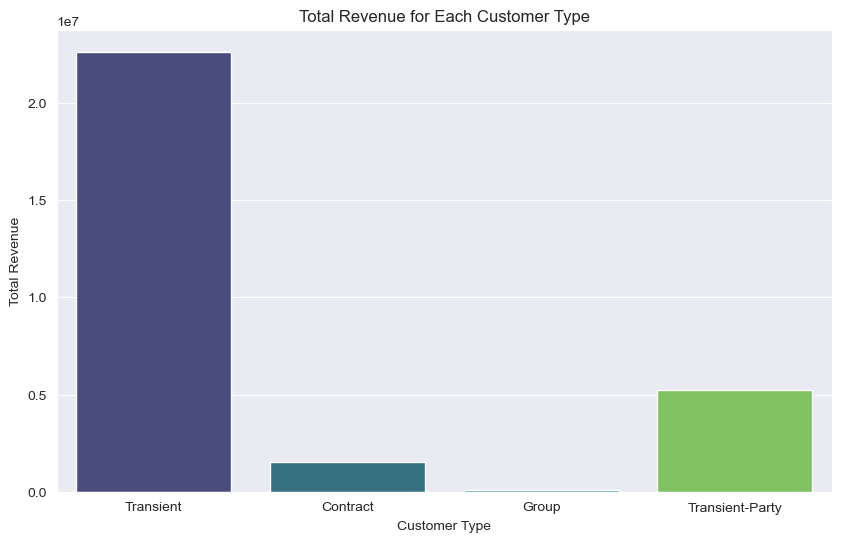

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x='Customer Type', y='Revenue', data=bookings, estimator=sum, ci=None, palette='viridis')
plt.title('Total Revenue for Each Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Revenue')
plt.show()

In [80]:
revenue_by_customer_type = bookings.groupby('Customer Type')['Revenue'].sum()
revenue_by_customer_type

Customer Type
Contract            1555189.13
Group                122673.90
Transient          22609343.08
Transient-Party     5218029.54
Name: Revenue, dtype: float64

In [81]:
revenue_by_country_10 = bookings.groupby('Country')['Revenue'].sum().nlargest(10)
revenue_by_country_10

Country
Portugal          9031988.37
United Kingdom    4152128.14
France            3100696.28
Spain             2282030.49
Germany           2068354.65
Ireland           1240002.35
Italy              866439.42
Belgium            764497.06
Netherlands        631663.15
Switzerland        548796.40
Name: Revenue, dtype: float64

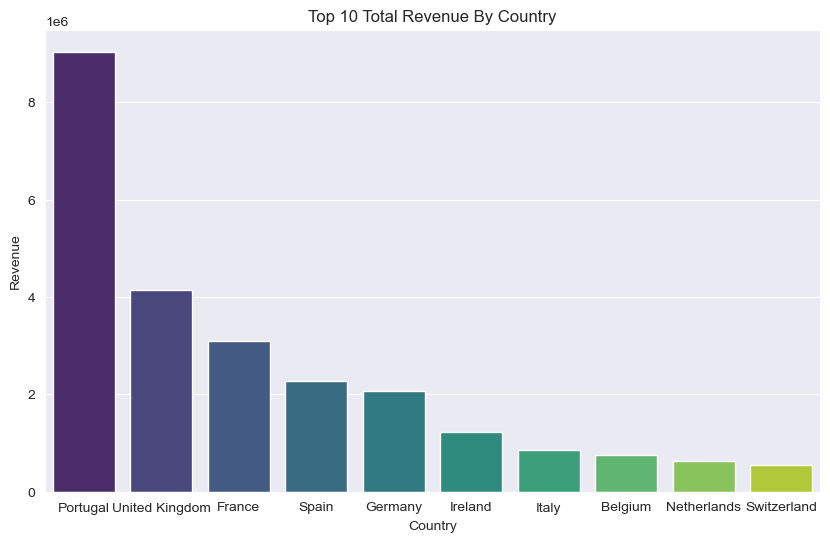

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(x=revenue_by_country_10.index, y=revenue_by_country_10.values,palette='viridis')
plt.title('Top 10 Total Revenue By Country')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.show()

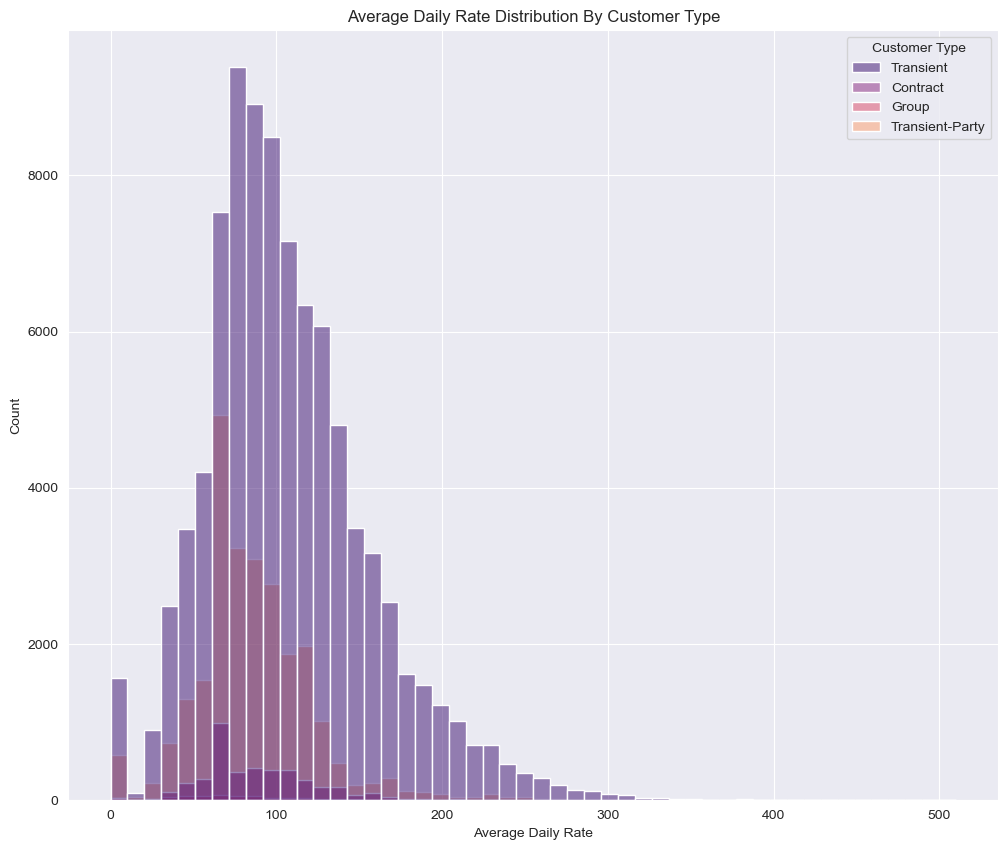

In [83]:
plt.figure(figsize=(12,10))
sns.histplot(data=bookings,x='Avg Daily Rate',hue='Customer Type',kde=False,bins=50,palette='magma')
plt.title('Average Daily Rate Distribution By Customer Type')
plt.xlabel('Average Daily Rate')
plt.ylabel('Count')
plt.show()

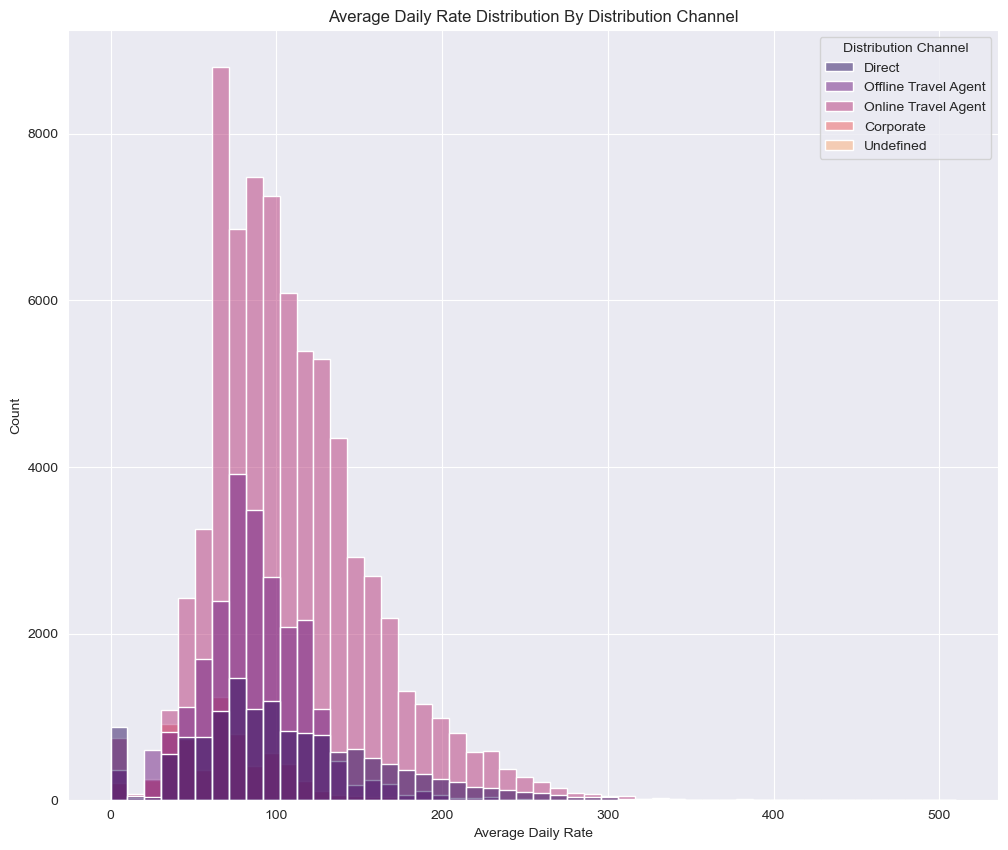

In [84]:
plt.figure(figsize=(12,10))
sns.histplot(data=bookings,x='Avg Daily Rate',hue='Distribution Channel',kde=False,bins=50,palette='magma')
plt.title('Average Daily Rate Distribution By Distribution Channel')
plt.xlabel('Average Daily Rate')
plt.ylabel('Count')
plt.show()

In [85]:
avg_daily_rate_customer_type = bookings.groupby('Customer Type')['Avg Daily Rate'].describe().T
print(avg_daily_rate_customer_type)

Customer Type     Contract       Group     Transient  Transient-Party
count          4076.000000  570.000000  89173.000000     25081.000000
mean             87.549637   84.023351    107.186144        86.115018
std              33.687604   50.195261     50.247965        36.831977
min               0.000000    0.000000      0.000000         0.000000
25%              62.000000   53.575000     74.800000        62.800000
50%              82.870000   75.000000     99.000000        81.000000
75%             106.860000  109.000000    133.200000       105.000000
max             250.000000  318.000000    510.000000       451.500000


In [86]:
avg_daily_rate_distribution_channel = bookings.groupby('Distribution Channel')['Avg Daily Rate'].describe().T
print(avg_daily_rate_distribution_channel)

Distribution Channel    Corporate        Direct  Offline Travel Agent  \
count                 6491.000000  14482.000000          23931.000000   
mean                    70.094622    107.003439             87.001862   
std                     33.358679     61.841121             33.650403   
min                      0.000000      0.000000              0.000000   
25%                     45.000000     66.810000             68.000000   
50%                     65.000000     96.330000             85.330000   
75%                     90.000000    141.937500            107.100000   
max                    508.000000    451.500000            510.000000   

Distribution Channel  Online Travel Agent  Undefined  
count                        73991.000000    5.00000  
mean                           108.605447   46.24000  
std                             47.889055   46.02948  
min                              0.000000   12.00000  
25%                             75.000000   12.00000  
50%         

In [87]:
bookings['Nights'].describe().T

count    118900.000000
mean          3.430992
std           2.544873
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: Nights, dtype: float64

In [88]:
top_10_countries = bookings['Country'].value_counts().head(10).index
top_10 = bookings[bookings['Country'].isin(top_10_countries)]
top_10_average_nights = top_10.groupby('Country')['Nights'].describe().T
top_10_average_nights

Country,Belgium,Brazil,China,France,Germany,Ireland,Italy,Portugal,Spain,United Kingdom
count,2342.000000,2224.000000,2280.000000,10415.000000,7287.000000,3375.000000,3766.000000,48589.000000,8568.000000,12128.000000
mean,3.685312,3.488759,3.392105,3.509073,3.538768,5.145481,3.271907,2.915331,3.076331,4.789083
std,2.162066,2.510412,3.062996,2.084836,2.344090,2.745345,1.774810,2.360261,1.817778,3.257110
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,2.000000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,7.000000,4.000000,3.000000,4.000000,7.000000
max,28.000000,27.000000,29.000000,29.000000,42.000000,28.000000,26.000000,56.000000,46.000000,57.000000


#### Operational Efficiency

In [106]:
print("Average stay:",bookings['Nights'].mean())

Average stay: 3.430992430613961


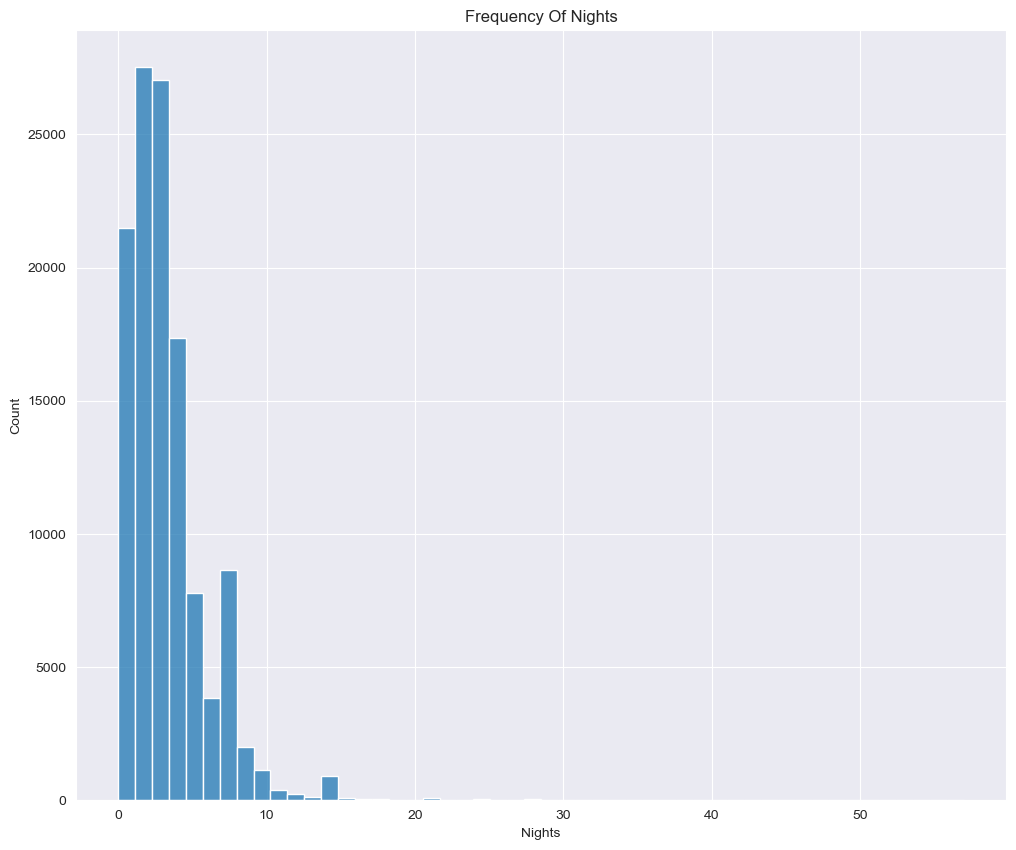

In [89]:
plt.figure(figsize=(12,10))
sns.histplot(x='Nights',data=bookings,bins=50, kde=False)
plt.title('Frequency Of Nights')
plt.xlabel('Nights')
plt.ylabel('Count')
plt.show()

In [90]:
avg_nights_customer_type = bookings.groupby('Customer Type')['Nights'].describe().T
print(avg_nights_customer_type)

Customer Type     Contract       Group     Transient  Transient-Party
count          4076.000000  570.000000  89173.000000     25081.000000
mean              5.320658    2.894737      3.451572         3.062916
std               3.943151    2.489233      2.533683         2.118412
min               0.000000    0.000000      0.000000         0.000000
25%               2.000000    1.000000      2.000000         2.000000
50%               4.000000    2.000000      3.000000         3.000000
75%               7.000000    4.000000      4.000000         4.000000
max              42.000000   14.000000     57.000000        49.000000


In [91]:
avg_nights_booking_channel = bookings.groupby('Distribution Channel')['Nights'].describe().T
print(avg_nights_booking_channel)

Distribution Channel    Corporate        Direct  Offline Travel Agent  \
count                 6491.000000  14482.000000          23931.000000   
mean                     2.408874      3.187819              3.922402   
std                      2.332290      2.671675              2.933038   
min                      0.000000      0.000000              0.000000   
25%                      1.000000      1.000000              2.000000   
50%                      2.000000      2.000000              3.000000   
75%                      3.000000      4.000000              5.000000   
max                     34.000000     45.000000             56.000000   

Distribution Channel  Online Travel Agent  Undefined  
count                        73991.000000    5.00000  
mean                             3.409320    3.40000  
std                              2.359813    2.50998  
min                              0.000000    1.00000  
25%                              2.000000    2.00000  
50%         

In [107]:
#average nightly stay per top 10 countries
top_10_countries_idx = bookings['Country'].value_counts().head(10).index
top_10_countries_data = bookings[bookings['Country'].isin(top_10_countries_idx)]
print(top_10_countries_data.groupby('Country')['Nights'].mean())

Country
Belgium           3.685312
Brazil            3.488759
China             3.392105
France            3.509073
Germany           3.538768
Ireland           5.145481
Italy             3.271907
Portugal          2.915331
Spain             3.076331
United Kingdom    4.789083
Name: Nights, dtype: float64


In [108]:
#average nightly stay for each Distribution Channel
print(bookings.groupby('Distribution Channel')['Nights'].mean())

Distribution Channel
Corporate               2.408874
Direct                  3.187819
Offline Travel Agent    3.922402
Online Travel Agent     3.409320
Undefined               3.400000
Name: Nights, dtype: float64


#### Impact of Deposit Types

In [92]:
bookings['Deposit Type'].value_counts()

No Deposit        104166
Non Refundable     14572
Refundable           162
Name: Deposit Type, dtype: int64

In [93]:
customer_deposit_type = bookings.groupby(['Customer Type','Deposit Type']).size().reset_index()
print(customer_deposit_type)


      Customer Type    Deposit Type      0
0          Contract      No Deposit   3530
1          Contract  Non Refundable    544
2          Contract      Refundable      2
3             Group      No Deposit    562
4             Group      Refundable      8
5         Transient      No Deposit  76259
6         Transient  Non Refundable  12894
7         Transient      Refundable     20
8   Transient-Party      No Deposit  23815
9   Transient-Party  Non Refundable   1134
10  Transient-Party      Refundable    132


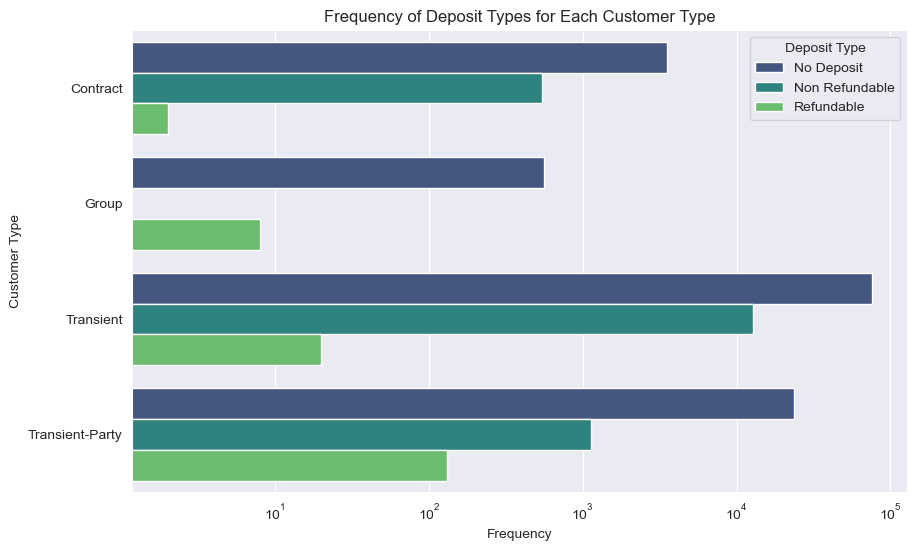

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(x=0, y='Customer Type', hue='Deposit Type', data=customer_deposit_type, palette='viridis')
plt.xscale('log')
plt.title('Frequency of Deposit Types for Each Customer Type')
plt.xlabel('Frequency')
plt.ylabel('Customer Type')
plt.show()

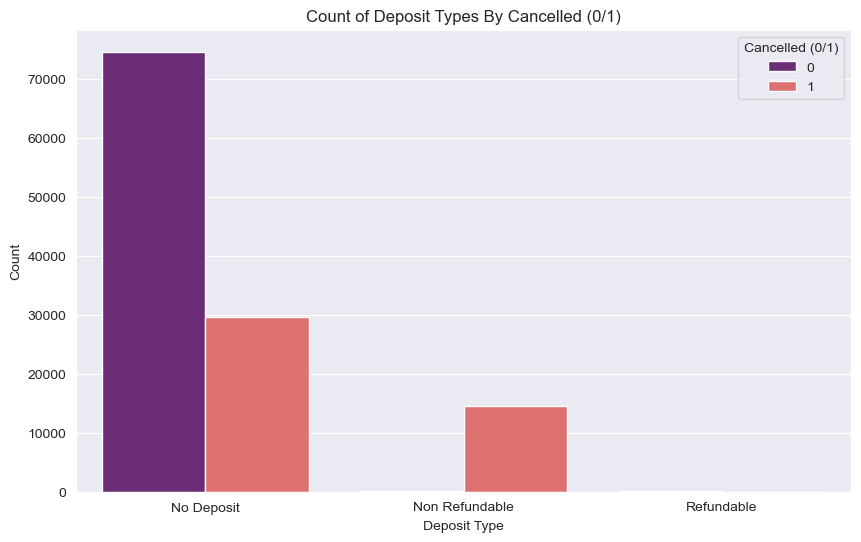

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(x='Deposit Type',hue='Cancelled (0/1)',data=bookings,palette='magma')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
#plt.yscale('log')
plt.title('Count of Deposit Types By Cancelled (0/1)')
plt.show()

In [96]:
print(bookings.groupby(['Deposit Type','Cancelled (0/1)'])['Deposit Type'].count())

Deposit Type    Cancelled (0/1)
No Deposit      0                  74525
                1                  29641
Non Refundable  0                     93
                1                  14479
Refundable      0                    126
                1                     36
Name: Deposit Type, dtype: int64


#### Time To Event Analysis

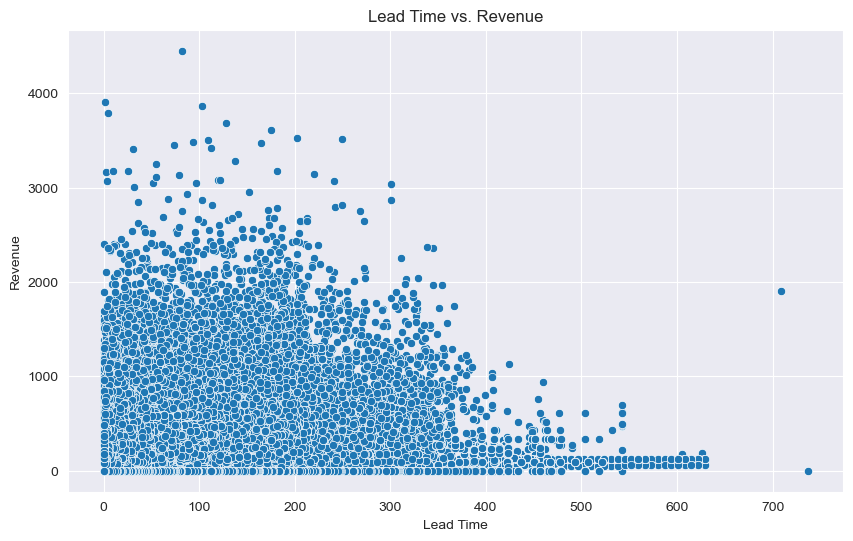

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lead Time', y='Revenue', data=bookings)
plt.title('Lead Time vs. Revenue')
plt.xlabel('Lead Time')
plt.ylabel('Revenue')
plt.show()

In [98]:
print("Revenue For Lead Time <= 100 days:",bookings.loc[bookings['Lead Time'] <= 100, 'Revenue'].sum())
print("Revenue For Lead Time > 100 days & <= 200 days:",bookings.loc[(bookings['Lead Time'] > 100) & (bookings['Lead Time'] <= 200), 'Revenue'].sum())
print("Revenue For Lead Time > 200 days & <= 300 days:",bookings.loc[(bookings['Lead Time'] > 200) & (bookings['Lead Time'] <= 300), 'Revenue'].sum())
print("Revenue For Lead Time >= 400 days:",bookings.loc[bookings['Lead Time'] >= 400, 'Revenue'].sum())

Revenue For Lead Time <= 100 days: 16341521.870000001
Revenue For Lead Time > 100 days & <= 200 days: 8171969.02
Revenue For Lead Time > 200 days & <= 300 days: 3330720.7199999997
Revenue For Lead Time >= 400 days: 374053.12


#### Comparison of Online and Online Travel Agents

In [99]:
bookings['Distribution Channel'].value_counts()

Online Travel Agent     73991
Offline Travel Agent    23931
Direct                  14482
Corporate                6491
Undefined                   5
Name: Distribution Channel, dtype: int64

In [101]:
print(bookings.groupby('Distribution Channel')['Revenue'].sum())

Distribution Channel
Corporate                 908301.27
Direct                   4381897.34
Offline Travel Agent     6979558.98
Online Travel Agent     17234914.56
Undefined                    563.50
Name: Revenue, dtype: float64


In [102]:
print(bookings.groupby('Distribution Channel')['Revenue'].mean())

Distribution Channel
Corporate               139.932409
Direct                  302.575427
Offline Travel Agent    291.653461
Online Travel Agent     232.932580
Undefined               112.700000
Name: Revenue, dtype: float64


In [103]:
print(bookings_cancelled.groupby('Distribution Channel')['Cancelled (0/1)'].count())

Distribution Channel
Corporate                1454
Direct                   2543
Offline Travel Agent     8171
Online Travel Agent     31984
Undefined                   4
Name: Cancelled (0/1), dtype: int64


### Analysis & Findings

#### Booking Patterns:

- Plotting a bargraph showing the number of bookings by month (1-12) revealed a trend showing that the majority of bookings made in the recorded timeframe took place in January. The plot further showed that as the months went by (Feburary...March....April and so forth) bookings decreased until around July where there was a spike in bookings and then declined until a spike was again seen in October followed by a decline throughout December.
- Further categorizing the months into seasons (Fall,Spring,Summer,Winter), revealed that the majority of **bookings** were made in the Winter followed by Fall then Spring and lastly Summer. However, when looking at the arrival seasons, the graph showed the opposite trend in that the majority of **arrivals** happened in the Summer followed by Spring then Fall and lastly Winter.
- A heatmap was created to display to show the relationship between the booking season and arrival season (when customers book during a particular season, what season are they scheduled to arrive). Winter bookings saw the majority of arrivals scheduled for the Spring season. Fall bookings saw the majority of arrivals scheduled for Fall. Summer bookings saw the majority of arrivals scheduled for Summer and Spring bookings had majority of arrivals set for Summer closely followed by Spring arrivals.

- The average lead time (time between date of booking and date of arrival was) of bookings was 104 days. Segmenting customers by distribution channel showed that: Undefined had the lowest average lead time of 23 days followed by Corportate with 46 days, Direct with 58 days, Online Travel Agent with 108 days and lastly Offline Travel Agent with the highest average lead time of 135 days. 
- It is also important to note that for each of the distribution channels there was a high standard deviation indicating a significant amount of variability in lead time. Customers may book earlier in advance or choose to book much closer to their arrival date which can make it harder for operational planning and resource allocation.
- The same pattern was seen when segmenting customers by their type and examining their lead time. Group customers had the lowest average lead time with 55 days followed by Transient with 93 days, Transient Party with 137 days and Contract customers with the highest average lead time of 142 days. Again, each had a high standard deviation meaning a signigicant amount of variability.

#### Customer Behavior Analysis:

- Segmenting customers by their preferred use of Distribution Channel saw that the vast majority used Online Travel Agent and the least used was Undefined. The average daily rate for Online Travel Agent was $108.60. The second most used Distribution Channel was Offline Travel Agent with an average daily rate of $87. The third most used was Direct with an average daily rate of $107 followed by Corporate with an average daily rate of $70 and the least used was Undefined with an average daily rate of $46.24.
- There were 174 unique countries represented in the dataset with the top 10 most frequent countries being: Portugal, United Kingdom, France, Spain, Germany, Italy, Ireland, Belgium, China and Brazil in this respective order.
- The majority of the customers were from Portugal which had 4x more customers than the country with the second highest amount of customers, United Kingdom. Portugal was represented 48589 times while the United Kingdom was represented 12128 times.

#### Cancellation Analysis:

- The values most strongly correlated with cancellations are Revenue Loss and Lead Time. Revenue Loss is self explanatory since cancellations would reflect a value for Revenue Loss while non-cancelled bookings would reflect a constant value of $0.
- The average lead time for a cancelled booking is 145 days whereas for a non-cancelled booking the lead time is 80 days. 
- The data was plotted on a histogram for both cancelled and non-cancelled bookings and showed that as lead time increases there is a higher possiblity of a booking being cancelled. Customers that book way earlier in advance would be much more likely to cancel a booking than customers who book 'last minute'. 
- The most used Distribution Channel for cancelled bookings is Online Travel Agent with 31894 bookings followed by Offline Travel Agent with 8171 bookings then Direct with 2543 bookings followed by Corporate with 1454 bookings and Undefined with the least with 4 bookings.
- Online Travel Agent contributed the most to revenue loss with a value of $10,782,870. 
- Segmenting Customers by Customer Type saw that Transient customers had the majority of cancelled bookings, followed by Transient Party then Contract and Group with the least amount of cancelled bookings.
- The same trend is seen for revenue loss by Customer Type. Transient had a total revenue loss of $11,494,579 and Group had the least with $17,325.

#### Revenue Optimization:

- The overall revenue made wasa $29,505,235 while the overall revenue lost was $13,110,238.
- Transient customers contributed significantly to the  total revenue with a value of $11,114,763. Transient Party with a value of $3,903,585. Contract with a value of $1,271,300 and Group with the least amount of $105,348.
- Looking at the top 10 countries with the most amount of bookings, Portugal contributed the most to the overall revenue with a value of $3,940,237 while Switzerland contributed the least with $303,395.
- Segmenting customers by Customer Type saw that the average daily rate for Transient customers was $107, $87 for Contract customers, $86 for Transient Party customers and the least was $84 for Group customers. 
- Segmenting customers by Distribution Channel saw that the average daily rate for Online Travel Agent was $108, Direct with $107, Offline Travel Agent with $87, Corporate with $70 and the lease was Group with $46.

#### Geographical Analysis

- Bookings comprise of guests from 174 unique countries with the top 10 being Portugal, United Kingdom, France, Spain, Germany, Italy, Ireland, Belgium, China and Brazil respectively.
- Further examining the top 10 most frequent countries, Portugal which was the most frequent country had more cancellations than non-cancelled bookings. Aprroximately 56% of the total bookings with customers from Portugal resulted in cancellations. 
- The 9 other frequent countries had more non-cancelled bookings than cancellations. 
- The average lead time is 108 days. Of the top 10 most frequent countries, Germany, United Kingdom, Ireland and Portugal had greater average lead times than 108 days. 

#### Operational Efficiency:

- The average length of stay for guests was 3 nights.
- Segmenting customers by Customer Type revealed that the average length of stay for Contract customers was 5 nights, followed by Transient with 3 nights then Transient Party with 3 nights and lastly Group with 3 nights.
- Segmenting customers by Distribution Channel revealed that the average length of stay for Offline Travel Agents was 4 nights followed together by Online Travel Agent, Undefined and Direct with 3 nights and lastly Corporate with 4 nights.

#### Impact of Deposit Types:

- A significant amount of customers chose No Deposit (104166), followed by Non Refundable (14572) while the least chosen deposit type was Refundable (162).
- 28% of bookings that chose No Deposit resulted in a cancellation while 72% were non-cancelled bookings.
- Interestingly, of the 14572 customers that chose a Non-Refundable deposit type, 99% of those bookings made were cancelled.
- Bookings that were Refundable, 22% of those bookings were cancelled.
- Segmenting customers by customer Type revealed that all customer types preferred No Deposit followed by Non-Refundable and Refundable. Group customers did not choose Non Refundable in any of their bookings.


#### Time to Event Analysis:

- The overall trend seen is that when lead time is short, the booking is less likely to be cancelled. However, as lead time increases the more likely it is for the booking to be cancelled. This was expanded upon in the Cancellation Analysis Findings section.
- Shorter lead times result in more revenue as these bookings are not likely to be cancelled. Bookings which had lead times less than or equal to 100 days generated significantly more revenue than lead times greater than 100 days.

#### Comparison of Online and Offline Travel Agents:

- Online Travel Agents contributed more total revenue than Offline Travel Agents with a value of $6,452,043.74 and $5,875,168.51 respectively. However,The average total revenue for Online Travel Agents was less than that of Offline Travel Agents with values of $87.00 and $245.00 respectively.
- Online Travel Agents had significantly more cancellations than Offline Travel Agents with values of 31984 and 8171 respectively. These two Distribution Channels had more cancellations than the other Distribution Channels.

### Recommendations

- We can capitalize on seasonal bookings by running promotions and deals as we have a good understanding of what seasons and months see the majority of bookings being made and when these guests are scheduled to arrive. For example, based on the findings, we know that the majority of bookings were made during the Winter season while majority of arrivals were scheduled for the Summer season. Upon further inspection, we know that Winter bookings saw the majority of arrivals scheduled for the Spring season. Fall bookings saw the majority of arrivals scheduled for Fall. Summer bookings saw the majority of arrivals scheduled for Summer and Spring bookings had majority of arrivals set for Summer closely followed by Spring arrivals. By having deals and promotions in place based on this, it further incentivize customers to continue making bookings.
- SHG has guests from over 174 countries but we have identified the top 10 most frequent countries as well as the top 10 countries that generate the most revenue and therefore we can continue to allocate more resources and marketing efforts to maintain and potentially grow this stream of revenue while continuosly monitoring market dynamics.
- One of the main issues that needs to be addressed is cancellation rates which always represents a revenue loss and affects operational efficiency negatively. The number 1 leading factor to cancellation is lead time which is the time between the booking was made and the scheduled date of arrival. In the analysis we saw that when lead time was shorter, the greater the revenue. As lead time increases, so does the likelihood for a customer to cancel their booking. When looking at deposit types used by customers who eventually cancelled, the majority used a no-deposit type then non-refundable and the least used by a significant amount was refundable. We can design loyalty programs for customers that follow through with their bookings. In the analysis we saw that lead times less than 100 days generated the most amount of revenue. We can put in place discounts for customers that choose to book at least three months in advance. Another option is implementing a cancellation policy that either requires a customer to pay a mandatory deposit or we can introduce a penalty system where a fee is paid if the customer fails to notify their cancellation status within a reasonable amount of time.
- For customers that chose to cancel their booking we can follow up with an email or survey to find out the reasons for cancellation and if this is something that can be addressed. For example, the majority of bookings are from Portugal but these bookings have more cancellations than successful bookings. We need to find out exactly why this is by having surveys and follow up emails which can then be analyzed and addressed.


### Resources

- [Tableau Dashboards](https://public.tableau.com/app/profile/justin.liam.hector/viz/SplendorHotelGroup/SHGCustomerDashboard?publish=yes)